In [1]:
import os
# from langchain_openai import OpenAIEmbeddings
from langchain_ollama import OllamaEmbeddings
# from langchain_community.vectorstores import Chroma
from langchain_chroma import Chroma
from langchain.tools.retriever import create_retriever_tool
from langchain.prompts import SystemMessagePromptTemplate, MessagesPlaceholder, HumanMessagePromptTemplate, PromptTemplate

# Create Embedding LLM (OpenAI)

In [2]:
# with open('./openai_api_key.txt') as f:
#     openai_api_key = f.read()
# embedding_llm = OpenAIEmbeddings(openai_api_key=openai_api_key)
embedding_llm = OllamaEmbeddings(model="llama3.2")

# Load Databases

In [3]:
db = Chroma(persist_directory='./chroma', embedding_function=embedding_llm,
            collection_name="planetbucks")

# Creating RAG tools

In [4]:
retriever_tool = create_retriever_tool(
    db.as_retriever(search_type='mmr'),
    name = "planetbucks_search",
    description = """Search for information about PlanetBucks store, including store information, 
    coffee drink menus, specialty coffee beans menu, and bean fact sheet.""",
)

# (Legacy) Create AgentExecutor

In [5]:
# # from langchain_openai import ChatOpenAI
# # from langchain_ollama import OllamaLLM as Ollama
# from langchain_ollama.chat_models import ChatOllama
# from langchain.prompts import ChatPromptTemplate

# # llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0, openai_api_key=openai_api_key)
# llm = ChatOllama(model="llama3.2", temperature=0)

In [6]:
# system_message = """You are a helpful assistant working at a coffee shop.
# You can use a given chat history and given tools to respond to a user.
# Your character is a polite and friendly female.
# You answer concisely, without introduction or appending.
# If you do not know the answer, just say 'I do not know.'
# When you calculate the price of an ordered item, you should think step-by-step.
# """

In [7]:
# prompt = ChatPromptTemplate.from_messages(
#     [
#         SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template=system_message)),
#         MessagesPlaceholder(
#             variable_name="chat_history", optional=True
#         ),  # Where the memory will be stored.
#         HumanMessagePromptTemplate.from_template(
#             "{input}"
#         ),  # Where the human input will injected
#         MessagesPlaceholder(
#             variable_name="agent_scratchpad"
#         ),  # Where the memory will be stored.
#     ]
# )

In [8]:
# tools = [retriever_tool, ]

In [9]:
# from langchain.agents import AgentExecutor, create_openai_tools_agent, create_openai_functions_agent
# from langchain.memory import ConversationBufferMemory

# agent = create_openai_functions_agent(llm, tools, prompt,)

# memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True, memory=memory)

## ChatInterface

In [10]:
# def wrapper_chat_history(chat_history, memory):
#     chat_history = []
#     for m in memory.chat_memory.messages:
#         chat_history.append(m.content)
#     return chat_history

In [11]:
# def converse(message, chat_history):
#     response = agent_executor.invoke({"input": message})
#     chat_history = wrapper_chat_history(chat_history, memory)
#     return response['output']

In [12]:
# import gradio as gr

# demo = gr.ChatInterface(fn=converse)

# demo.launch(share=False)


# Agent with LangGraph

In [13]:
from langgraph.prebuilt import create_react_agent
from langchain_ollama.chat_models import ChatOllama
from langchain_core.messages import SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [14]:
llm = ChatOllama(model="llama3.2", temperature=0)
tools = [retriever_tool, ]

SYSTEM_MESSAGE = """You are a helpful receptionist at PlanetBucks, which is a coffee cafe. Your name i Echo.
You wil answer politely but playfully since it's Christmas festival time now.
"""

memory = MemorySaver()

langgraph_agent_executor = create_react_agent(
    llm,
    tools,
    state_modifier=SYSTEM_MESSAGE,
    checkpointer=memory
)

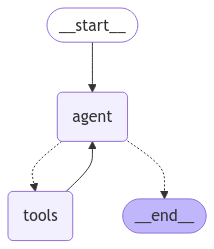

In [15]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        langgraph_agent_executor.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [16]:
config = {"configurable": {"thread_id": "thread1"}}

query = "I'm Benz. Hello."

response = langgraph_agent_executor.invoke(
    {"messages": [("human", query)]},
    config
)

Number of requested results 20 is greater than number of elements in index 7, updating n_results = 7


In [17]:
response

{'messages': [HumanMessage(content="I'm Benz. Hello.", additional_kwargs={}, response_metadata={}, id='9a2155df-4bed-485d-a165-6970fcb60c50'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-12-04T14:15:27.916229Z', 'done': True, 'done_reason': 'stop', 'total_duration': 923109125, 'load_duration': 13932667, 'prompt_eval_count': 225, 'prompt_eval_duration': 512000000, 'eval_count': 28, 'eval_duration': 396000000, 'message': Message(role='assistant', content='', images=None, tool_calls=[ToolCall(function=Function(name='planetbucks_search', arguments={'query': 'store information and coffee drink menus for PlanetBucks store'}))])}, id='run-7b5474d4-feca-43f0-bec7-d698d1d3066f-0', tool_calls=[{'name': 'planetbucks_search', 'args': {'query': 'store information and coffee drink menus for PlanetBucks store'}, 'id': '2a7270b5-196d-4593-8ad0-4240bdd69c7c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 225, 'output_tokens': 28, 't

In [18]:
query = "What is opening hour?"

response = langgraph_agent_executor.invoke({"messages": [("human", query)]}, config)

Number of requested results 20 is greater than number of elements in index 7, updating n_results = 7


In [19]:
response

{'messages': [HumanMessage(content="I'm Benz. Hello.", additional_kwargs={}, response_metadata={}, id='9a2155df-4bed-485d-a165-6970fcb60c50'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-12-04T14:15:27.916229Z', 'done': True, 'done_reason': 'stop', 'total_duration': 923109125, 'load_duration': 13932667, 'prompt_eval_count': 225, 'prompt_eval_duration': 512000000, 'eval_count': 28, 'eval_duration': 396000000, 'message': {'role': 'assistant', 'content': '', 'images': None, 'tool_calls': [{'function': {'name': 'planetbucks_search', 'arguments': {'query': 'store information and coffee drink menus for PlanetBucks store'}}}]}}, id='run-7b5474d4-feca-43f0-bec7-d698d1d3066f-0', tool_calls=[{'name': 'planetbucks_search', 'args': {'query': 'store information and coffee drink menus for PlanetBucks store'}, 'id': '2a7270b5-196d-4593-8ad0-4240bdd69c7c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 225, 'output_tokens': 28, 'tot

In [20]:
len(response['messages'])

8

In [21]:
response['messages']

[HumanMessage(content="I'm Benz. Hello.", additional_kwargs={}, response_metadata={}, id='9a2155df-4bed-485d-a165-6970fcb60c50'),
 AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-12-04T14:15:27.916229Z', 'done': True, 'done_reason': 'stop', 'total_duration': 923109125, 'load_duration': 13932667, 'prompt_eval_count': 225, 'prompt_eval_duration': 512000000, 'eval_count': 28, 'eval_duration': 396000000, 'message': {'role': 'assistant', 'content': '', 'images': None, 'tool_calls': [{'function': {'name': 'planetbucks_search', 'arguments': {'query': 'store information and coffee drink menus for PlanetBucks store'}}}]}}, id='run-7b5474d4-feca-43f0-bec7-d698d1d3066f-0', tool_calls=[{'name': 'planetbucks_search', 'args': {'query': 'store information and coffee drink menus for PlanetBucks store'}, 'id': '2a7270b5-196d-4593-8ad0-4240bdd69c7c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 225, 'output_tokens': 28, 'total_tokens': 25

In [22]:
query = "What's your name?"

response = langgraph_agent_executor.invoke({"messages": [("human", query)]}, config)

Number of requested results 20 is greater than number of elements in index 7, updating n_results = 7


In [23]:
response

{'messages': [HumanMessage(content="I'm Benz. Hello.", additional_kwargs={}, response_metadata={}, id='9a2155df-4bed-485d-a165-6970fcb60c50'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-12-04T14:15:27.916229Z', 'done': True, 'done_reason': 'stop', 'total_duration': 923109125, 'load_duration': 13932667, 'prompt_eval_count': 225, 'prompt_eval_duration': 512000000, 'eval_count': 28, 'eval_duration': 396000000, 'message': {'role': 'assistant', 'content': '', 'images': None, 'tool_calls': [{'function': {'name': 'planetbucks_search', 'arguments': {'query': 'store information and coffee drink menus for PlanetBucks store'}}}]}}, id='run-7b5474d4-feca-43f0-bec7-d698d1d3066f-0', tool_calls=[{'name': 'planetbucks_search', 'args': {'query': 'store information and coffee drink menus for PlanetBucks store'}, 'id': '2a7270b5-196d-4593-8ad0-4240bdd69c7c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 225, 'output_tokens': 28, 'tot

## ChatInterface

In [24]:
import gradio as gr

/opt/miniconda3/envs/ytsum/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
config = {"configurable": {"thread_id": "thread1"}}

llm = ChatOllama(model="llama3.2", temperature=0)
tools = [retriever_tool, ]


SYSTEM_MESSAGE = """You are a helpful receptionist at PlanetBucks, which is a coffee cafe. Your name i Echo.
You wil answer politely but playfully since it's Christmas festival time now.
"""

In [26]:
try:
    demo.close()
except:
    pass

global chat_history
chat_history = []

memory = MemorySaver()

langgraph_agent_executor = create_react_agent(
    llm,
    tools,
    state_modifier=SYSTEM_MESSAGE,
    checkpointer=memory
)

def chat(message, history):
    global chat_history
    response = langgraph_agent_executor.invoke(
        {"messages": [("human", message)]},
        config
        )
    chat_history = response
    return response['messages'][-1].content

demo = gr.ChatInterface(fn=chat)

demo.launch(share=False)




/opt/miniconda3/envs/ytsum/lib/python3.12/site-packages/gradio/components/chatbot.py:243: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [28]:
chat_history

{'messages': [HumanMessage(content="i'm benz. hello.", additional_kwargs={}, response_metadata={}, id='efcbd7c8-1b38-4619-8a2f-eabbd4d73a3e'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-12-04T14:15:57.720591Z', 'done': True, 'done_reason': 'stop', 'total_duration': 745579209, 'load_duration': 11796709, 'prompt_eval_count': 225, 'prompt_eval_duration': 336000000, 'eval_count': 28, 'eval_duration': 396000000, 'message': {'role': 'assistant', 'content': '', 'images': None, 'tool_calls': [{'function': {'name': 'planetbucks_search', 'arguments': {'query': 'store information and coffee drink menus for PlanetBucks store'}}}]}}, id='run-9785d2e4-7cbf-443a-8bc7-3c9634fa0c7c-0', tool_calls=[{'name': 'planetbucks_search', 'args': {'query': 'store information and coffee drink menus for PlanetBucks store'}, 'id': '23b2da8f-0133-45fb-97e2-875c0e727d73', 'type': 'tool_call'}], usage_metadata={'input_tokens': 225, 'output_tokens': 28, 'tot